In [0]:
!pip install schedule

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import matplotlib.ticker as ticker
import schedule
import time
#%matplotlib inline #if you're working in a Jupyter notebook
df = pd.read_csv('https://raw.githubusercontent.com/datasets/covid-19/master/data/countries-aggregated.csv', parse_dates=['Date'])
df.head()


,Date,Country,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,0,0,0
1,2020-01-22,Albania,0,0,0
2,2020-01-22,Algeria,0,0,0
3,2020-01-22,Andorra,0,0,0
4,2020-01-22,Angola,0,0,0


In [0]:
countries = ['Canada', 'Germany', 'United Kingdom', 'US', 'France', 'China','Pakistan','India']
df = df[df['Country'].isin(countries)]
df.head()


,Date,Country,Confirmed,Recovered,Deaths
32,2020-01-22,Canada,0,0,0
36,2020-01-22,China,548,28,17
61,2020-01-22,France,0,0,0
65,2020-01-22,Germany,0,0,0
78,2020-01-22,India,0,0,0


In [0]:
# Section 3 - Creating a Summary Column
df['Cases'] = df[['Confirmed', 'Recovered', 'Deaths']].sum(axis=1)
df.head()

,Date,Country,Confirmed,Recovered,Deaths,Cases
32,2020-01-22,Canada,0,0,0,0
36,2020-01-22,China,548,28,17,593
61,2020-01-22,France,0,0,0,0
65,2020-01-22,Germany,0,0,0,0
78,2020-01-22,India,0,0,0,0


In [0]:
df

,Date,Country,Confirmed,Recovered,Deaths,Cases
32,2020-01-22,Canada,0,0,0,0
36,2020-01-22,China,548,28,17,593
61,2020-01-22,France,0,0,0,0
65,2020-01-22,Germany,0,0,0,0
78,2020-01-22,India,0,0,0,0
...,...,...,...,...,...,...
17640,2020-04-26,Germany,157770,112000,5976,275746
17653,2020-04-26,India,27890,6523,881,35294
17703,2020-04-26,Pakistan,13328,2936,281,16545
17746,2020-04-26,US,965785,106988,54881,1127654


In [0]:
# Section 4 - Restructuring our Data
df = df.pivot(index='Date', columns='Country', values='Cases')
df.head()


Country,Canada,China,France,Germany,India,Pakistan,US,United Kingdom
Date,,,,,,,,
2020-01-22,0,593,0,0,0,0,1,0
2020-01-23,0,691,0,0,0,0,1,0
2020-01-24,0,982,2,0,0,0,2,0
2020-01-25,0,1487,3,0,0,0,2,0
2020-01-26,1,2180,3,0,0,0,5,0


In [0]:
countries = list(df.columns)
covid = df.reset_index('Date')
covid.set_index(['Date'], inplace=True)
covid.columns = countries
covid.head()

,Canada,China,France,Germany,India,Pakistan,US,United Kingdom
Date,,,,,,,,
2020-01-22,0,593,0,0,0,0,1,0
2020-01-23,0,691,0,0,0,0,1,0
2020-01-24,0,982,2,0,0,0,2,0
2020-01-25,0,1487,3,0,0,0,2,0
2020-01-26,1,2180,3,0,0,0,5,0


In [0]:
covid.tail()

,Canada,China,France,Germany,India,Pakistan,US,United Kingdom
Date,,,,,,,,
2020-04-22,58177,166365,218679,255327,26421,12444,964339,153472
2020-04-23,60286,166503,222954,262004,28810,13919,999327,158749
2020-04-24,61587,166644,226502,270559,30808,14948,1056386,164931
2020-04-25,64051,166720,229664,272190,33047,15858,1092281,170724
2020-04-26,66689,166826,230791,275746,35294,16545,1127654,175609


In [0]:
covid['Pakistan'].to_list()

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 2,
 2,
 4,
 4,
 4,
 5,
 5,
 5,
 6,
 6,
 7,
 7,
 17,
 21,
 22,
 30,
 33,
 55,
 138,
 238,
 301,
 469,
 517,
 746,
 786,
 886,
 997,
 1092,
 1231,
 1407,
 1536,
 1640,
 1814,
 2040,
 2239,
 2580,
 2852,
 2990,
 3415,
 4078,
 4521,
 4791,
 5126,
 5488,
 5859,
 6349,
 6684,
 7311,
 7940,
 8692,
 8925,
 9613,
 10384,
 10564,
 11839,
 12444,
 13919,
 14948,
 15858,
 16545]

In [0]:
# Section 5 - Calculating Rates per 100,000
populations = {'Canada':37664517, 'Germany': 83721496 , 'United Kingdom': 67802690 , 'US': 330548815, 'France': 65239883, 'China':1438027228,'Pakistan': 219942372 , 'India': 1376991671}
percapita = covid.copy()
for country in list(percapita.columns):
    percapita[country] = percapita[country]/populations[country]*100000

Text(2020-01-23 00:00:00, -100000, 'datagy.io                      Source: https://github.com/datasets/covid-19/blob/master/data/countries-aggregated.csv')

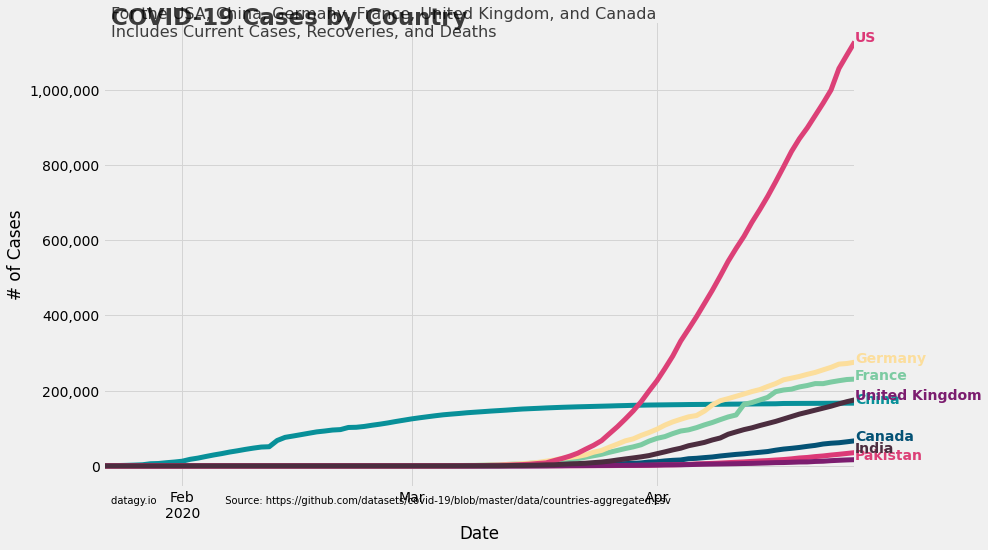

In [0]:
# Section 6 - Generating Colours and Style
colors = {'Canada':'#045275', 'China':'#089099', 'France':'#7CCBA2', 'Germany':'#FCDE9C', 'US':'#DC3977', 'United Kingdom':'#7C1D6F','Pakistan':'#DC4077', 'India':'#4C2D3F'}
plt.style.use('fivethirtyeight')

# Section 7 - Creating the Visualization
plot = covid.plot(figsize=(12,8), color=list(colors.values()), linewidth=5, legend=False)
plot.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plot.grid(color='#d4d4d4')
plot.set_xlabel('Date')
plot.set_ylabel('# of Cases')

# Section 8 - Assigning Colour
for country in list(colors.keys()):
    plot.text(x = covid.index[-1], y = covid[country].max(), color = colors[country], s = country, weight = 'bold')

# Section 9 - Adding Labels
plot.text(x = covid.index[1], y = int(covid.max().max())+45000, s = "COVID-19 Cases by Country", fontsize = 23, weight = 'bold', alpha = .75)
plot.text(x = covid.index[1], y = int(covid.max().max())+15000, s = "For the USA, China, Germany, France, United Kingdom, and Canada\nIncludes Current Cases, Recoveries, and Deaths", fontsize = 16, alpha = .75)
plot.text(x = percapita.index[1], y = -100000,s = 'datagy.io                      Source: https://github.com/datasets/covid-19/blob/master/data/countries-aggregated.csv', fontsize = 10)


Text(2020-01-23 00:00:00, -55, 'datagy.io                      Source: https://github.com/datasets/covid-19/blob/master/data/countries-aggregated.csv')

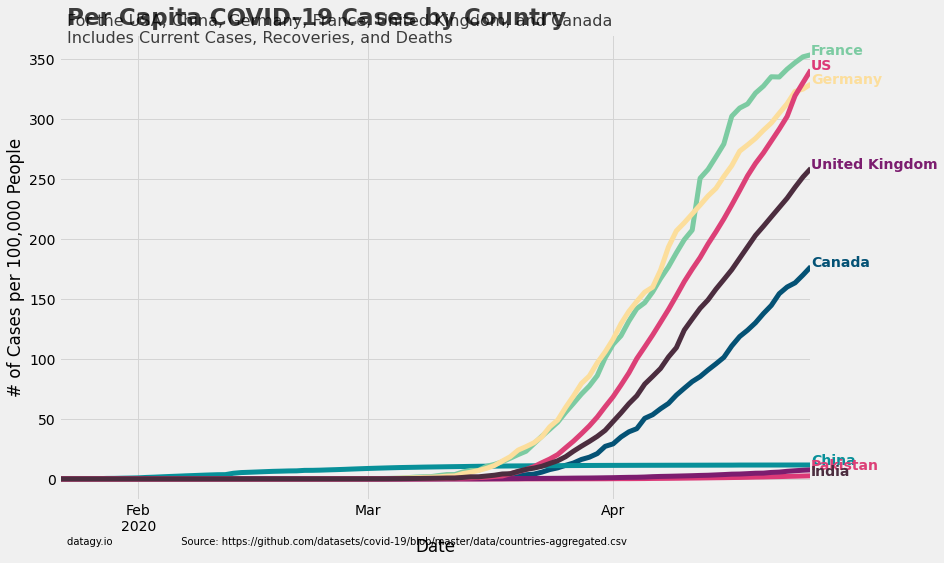

In [0]:
#CASES PER 100,000 PEOPLE
percapitaplot = percapita.plot(figsize=(12,8), color=list(colors.values()), linewidth=5, legend=False)
percapitaplot.grid(color='#d4d4d4')
percapitaplot.set_xlabel('Date')
percapitaplot.set_ylabel('# of Cases per 100,000 People')
for country in list(colors.keys()):
    percapitaplot.text(x = percapita.index[-1], y = percapita[country].max(), color = colors[country], s = country, weight = 'bold')
percapitaplot.text(x = percapita.index[1], y = percapita.max().max()+25, s = "Per Capita COVID-19 Cases by Country", fontsize = 23, weight = 'bold', alpha = .75)
percapitaplot.text(x = percapita.index[1], y = percapita.max().max()+10, s = "For the USA, China, Germany, France, United Kingdom, and Canada\nIncludes Current Cases, Recoveries, and Deaths", fontsize = 16, alpha = .75)
percapitaplot.text(x = percapita.index[1], y = -55,s = 'datagy.io                      Source: https://github.com/datasets/covid-19/blob/master/data/countries-aggregated.csv', fontsize = 10)
